# Hi :)

----

# Import libraries

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from xgboost import XGBClassifier
import joblib
import seaborn as sns
import matplotlib.pyplot as plt

# ITG

# Loading the dataset

In [2]:
ITG_features_df= pd.read_csv('Dataset/ITG_features_df.csv')

# XGB

In [3]:
# Step 1: Extract features and labels
X= ITG_features_df[['F1_sum_vector_magnitude', 'F2_orientation_angle', 'F3_std_magnitude']].values
y= ITG_features_df['Situation'].values

# Step 2: Encode labels ('Fall' → 1, 'Not Fall' → 0)
label_encoder= LabelEncoder()
y_encoded= label_encoder.fit_transform(y)

# Step 3: Split dataset
X_train, X_test, y_train, y_test= train_test_split(X, y_encoded, test_size= 0.2, random_state= 48, stratify= y_encoded)

In [4]:
# Hyperparameter tuning
param_grid= {
    'n_estimators' : [100, 200],
    'max_depth' : [3, 5, 7],
    'learning_rate' : [0.01, 0.1, 0.3],
    'subsample' : [0.8, 1.0]
}

xgb= XGBClassifier(objective= 'binary:logistic', use_label_encoder= False, eval_metric= 'logloss', random_state= 48)
grid_search= GridSearchCV(xgb, param_grid, cv= 5, scoring= 'accuracy', n_jobs= -1, verbose= 1)
grid_search.fit(X_train, y_train)

# Best hyperparameters
print("Best Parameters Found:")
print(grid_search.best_params_)

# Best estimator
best_xgb= grid_search.best_estimator_

Fitting 5 folds for each of 36 candidates, totalling 180 fits


f:\Quera\Qvenv\lib\site-packages\xgboost\training.py:183: UserWarning: [18:57:29] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Best Parameters Found:
{'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 200, 'subsample': 1.0}


Fitting 5 folds for each of 36 candidates, totalling 180 fits

Best Parameters Found:
{'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 200, 'subsample': 1.0}

In [ ]:
# Step 4: Train XGB
xgb= XGBClassifier(
    n_estimators= 200,
    max_depth= 5,
    learning_rate= 0.1,
    subsample= 1.0,
    objective= 'binary:logistic',
    use_label_encoder= False,
    eval_metric= 'logloss',
    random_state= 48
)

# Fit on training data
xgb.fit(X_train, y_train)

f:\Quera\Qvenv\lib\site-packages\xgboost\training.py:183: UserWarning: [18:59:45] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, feature_weights=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=200, n_jobs=None,
              num_parallel_tree=None, ...)

In [6]:
# Step 5: Evaluation
y_pred= xgb.predict(X_test)

Accuracy: 0.6764425369575584
Classification Report:
               precision    recall  f1-score   support

        Fall       0.66      0.72      0.69      2097
    Not Fall       0.69      0.63      0.66      2097

    accuracy                           0.68      4194
   macro avg       0.68      0.68      0.68      4194
weighted avg       0.68      0.68      0.68      4194



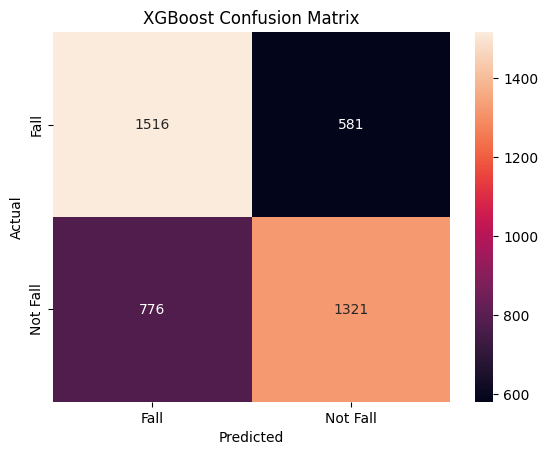

In [7]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred, target_names= label_encoder.classes_))

# Confusion Matrix
cm= confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot= True, fmt= 'd', xticklabels= label_encoder.classes_, yticklabels= label_encoder.classes_)
plt.title("XGBoost Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Saving the model

In [8]:
# Save model
joblib.dump(xgb, 'Models/XGB/SingleSensor/XGB.pkl')

# # Save scaler if used
# joblib.dump(scaler, 'Models/XGB/SingleSensor/Scaler.pkl')

# Save encoder once and reuse
joblib.dump(label_encoder, 'Models/XGB/SingleSensor/LabelEncoder.pkl')

['Models/XGB/SingleSensor/LabelEncoder.pkl']

----

# Data Fusion

# Loading the dataset

In [9]:
KF_features_df= pd.read_csv('Dataset/KF_features_df.csv')

# XGB

In [10]:
# Step 1: Extract features and labels
X= KF_features_df[['F1_sum_vector_magnitude', 'F2_orientation_angle', 'F3_std_magnitude']].values
y= KF_features_df['Situation'].values

# Step 2: Encode labels ('Fall' → 1, 'Not Fall' → 0)
label_encoder= LabelEncoder()
y_encoded= label_encoder.fit_transform(y)

# Step 3: Split dataset
X_train, X_test, y_train, y_test= train_test_split(X, y_encoded, test_size= 0.2, random_state= 48, stratify= y_encoded)

In [11]:
# Hyperparameter tuning
param_grid= {
    'n_estimators' : [100, 200],
    'max_depth' : [3, 5, 7],
    'learning_rate' : [0.01, 0.1, 0.3],
    'subsample' : [0.8, 1.0]
}

xgb= XGBClassifier(objective= 'binary:logistic', use_label_encoder= False, eval_metric= 'logloss', random_state= 48)
grid_search= GridSearchCV(xgb, param_grid, cv= 5, scoring= 'accuracy', n_jobs= -1, verbose= 1)
grid_search.fit(X_train, y_train)

# Best hyperparameters
print("Best Parameters Found:")
print(grid_search.best_params_)

# Best estimator
best_xgb= grid_search.best_estimator_

Fitting 5 folds for each of 36 candidates, totalling 180 fits


f:\Quera\Qvenv\lib\site-packages\xgboost\training.py:183: UserWarning: [19:04:53] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Best Parameters Found:
{'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 100, 'subsample': 0.8}


Fitting 5 folds for each of 36 candidates, totalling 180 fits

Best Parameters Found:
{'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 100, 'subsample': 0.8}

In [12]:
# Step 4: Train XGB
xgb= XGBClassifier(
    n_estimators= 100,
    max_depth= 7,
    learning_rate= 0.1,
    subsample= 0.8,
    objective= 'binary:logistic',
    use_label_encoder= False,
    eval_metric= 'logloss',
    random_state= 48
)

# Fit on training data
xgb.fit(X_train, y_train)

f:\Quera\Qvenv\lib\site-packages\xgboost\training.py:183: UserWarning: [19:05:54] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, feature_weights=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=7, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, ...)

In [13]:
# Step 5: Evaluation
y_pred= xgb.predict(X_test)

Accuracy: 0.8028135431568908
Classification Report:
               precision    recall  f1-score   support

        Fall       0.83      0.76      0.79      2097
    Not Fall       0.78      0.85      0.81      2097

    accuracy                           0.80      4194
   macro avg       0.81      0.80      0.80      4194
weighted avg       0.81      0.80      0.80      4194



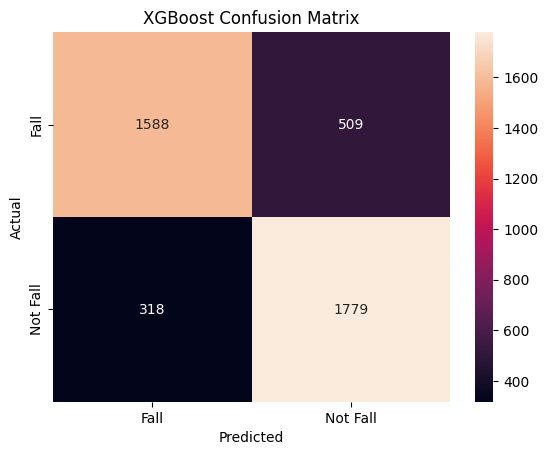

In [14]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred, target_names= label_encoder.classes_))

# Confusion Matrix
cm= confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot= True, fmt= 'd', xticklabels= label_encoder.classes_, yticklabels= label_encoder.classes_)
plt.title("XGBoost Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Saving the model

In [15]:
# Save model
joblib.dump(xgb, 'Models/XGB/DataFusion/XGB.pkl')

# # Save scaler if used
# joblib.dump(scaler, 'Models/XGB/DataFusion/Scaler.pkl')

# Save encoder once and reuse
joblib.dump(label_encoder, 'Models/XGB/DataFusion/LabelEncoder.pkl')

['Models/XGB/DataFusion/LabelEncoder.pkl']